In [89]:
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
import numpy as np
import matplotlib.pyplot as plt

# Creamos el sistema de 1 particula

In [2]:
sistema_de_lilus = mm.System()

In [7]:
mass = 39.948 * unit.amu # masa del átomo de argón

In [9]:
sistema_de_lilus.addParticle(mass)

0

In [10]:
sistema_de_lilus.getNumParticles()

1

# Estado termodinámico

In [11]:
# Formalismo NVT
temperature = 300*unit.kelvin
pressure    = None

# Parametros de la simulación

In [12]:
step_size       = 0.001*unit.picoseconds
num_steps       = 1000000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

# Integrador

In [60]:
friction   = 5.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

# Plataforma

In [23]:
platform = mm.Platform.getPlatformByName('CUDA')

# Reporteros

In [45]:
times = unit.Quantity(value=np.zeros(num_steps_saved, np.float32), unit=unit.picoseconds)

In [47]:
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)

In [49]:
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)

In [50]:
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

In [51]:
kinetic_energies     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

# Condiciones iniciales

In [52]:
initial_positions  = [[0.0, 0.0, 0.0]] * unit.angstroms

# Creamos el contexto

In [62]:
context = mm.Context(sistema_de_lilus, integrator, platform)

In [63]:
context.setPositions(initial_positions)

In [64]:
context.setVelocitiesToTemperature(temperature)

# Sacamos magnitudes del contexto

In [65]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [71]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [73]:
context.getIntegrator().step(saving_period)

In [74]:
state_100 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [79]:
context.getIntegrator().step(saving_period)

In [80]:
state_200 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [81]:
state_200.getTime()

Quantity(value=0.20000000000000015, unit=picosecond)

In [82]:
num_steps_saved

10000

In [84]:
for ii in range(num_steps_saved):
    context.getIntegrator().step(saving_period)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    print('Paso',ii,'con tiempo', state_xx.getTime())

Paso 0 con tiempo 1000.299999983258 ps
Paso 1 con tiempo 1000.3999999832556 ps
Paso 2 con tiempo 1000.4999999832532 ps
Paso 3 con tiempo 1000.5999999832509 ps
Paso 4 con tiempo 1000.6999999832485 ps
Paso 5 con tiempo 1000.7999999832462 ps
Paso 6 con tiempo 1000.8999999832438 ps
Paso 7 con tiempo 1000.9999999832414 ps
Paso 8 con tiempo 1001.0999999832391 ps
Paso 9 con tiempo 1001.1999999832367 ps
Paso 10 con tiempo 1001.2999999832343 ps
Paso 11 con tiempo 1001.399999983232 ps
Paso 12 con tiempo 1001.4999999832296 ps
Paso 13 con tiempo 1001.5999999832272 ps
Paso 14 con tiempo 1001.6999999832249 ps
Paso 15 con tiempo 1001.7999999832225 ps
Paso 16 con tiempo 1001.8999999832201 ps
Paso 17 con tiempo 1001.9999999832178 ps
Paso 18 con tiempo 1002.0999999832154 ps
Paso 19 con tiempo 1002.199999983213 ps
Paso 20 con tiempo 1002.2999999832107 ps
Paso 21 con tiempo 1002.3999999832083 ps
Paso 22 con tiempo 1002.499999983206 ps
Paso 23 con tiempo 1002.5999999832036 ps
Paso 24 con tiempo 1002.699999

Quantity(value=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), unit=kilocalorie/mole)

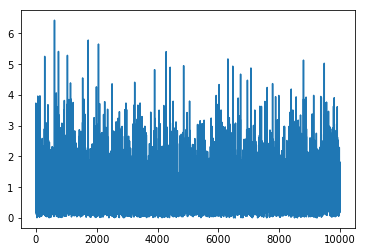

In [90]:
plt.plot(kinetic_energies)

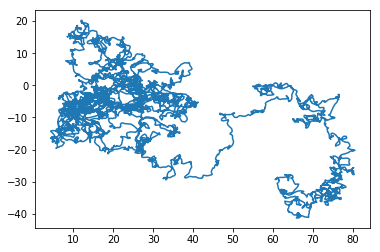

In [96]:
plt.plot(positions[:,0], positions[:,2])